<a href="https://colab.research.google.com/github/wijdenhamdi/SimpleRNN/blob/master/RNNSimple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Using TensorFlow backend.


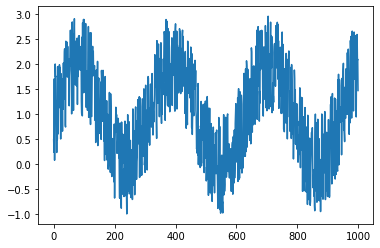

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d=i+step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

#For test purpose, we'll generate simple sequence data.

step = 4
N = 1000    
Tp = 800    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

plt.plot(df)
plt.show()



In [0]:
#we'll split 'df' dataset into a training and test parts
#800 for train and 200 for test
values=df.values
train,test = values[0:Tp,:], values[Tp:N,:]
#  the sizes of x input and y output become different. We'll fix it by adding step size into the training and test data

# add step=4 elements into train and test

test = np.append(test,np.repeat(test[-1,],step))
train = np.append(train,np.repeat(train[-1,],step))
 
trainX,trainY =convertToMatrix(train,step)
testX,testY =convertToMatrix(test,step)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
trainX.shape


(800, 1, 4)

In [0]:
#Building a model with SimpleRNN
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()
# fit model with trainX data and predict testX data.
model.fit(trainX,trainY, epochs=500, batch_size=16, verbose=2)


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_4 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_7 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
 - 0s - loss: 0.8489
Epoch 2/500
 - 0s - loss: 0.4136
Epoch 3/500
 - 0s - loss: 0.4012
Epoch 4/500
 - 0s - loss: 0.3987
Epoch 5/500
 - 0s - loss: 0.3950
Epoch 6/500
 - 0s - loss: 0.3931
Epoch 7/500
 - 0s - loss: 0.3927
Epoch 8/500
 - 0s - loss: 0.3914
Epoch 9/500
 - 0s - loss: 0.3895
Epoch 10/500
 - 0s - loss: 0.3888
Epoch 11/500
 - 0s - loss: 0.3861
Epoch 12/500
 - 0

loss : 0.29423099994659424


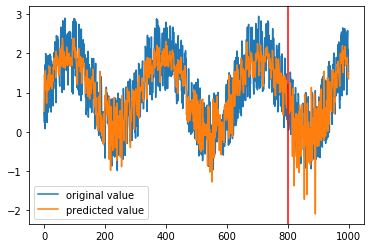

In [0]:
#Predicting and plotting result
trainPredict = model.predict(trainX)
testPredict= model.predict(testX)
predicted=np.concatenate((trainPredict,testPredict),axis=0)
#check the loss
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('loss :',trainScore)

index = df.index.values
plt.plot(index,df)
plt.plot(index,predicted)
plt.legend(['original value','predicted value'],loc='lower left')
plt.axvline(df.index[Tp], c="r")
plt.show()